In [1]:
%pylab inline
from skimage import io, filters

Populating the interactive namespace from numpy and matplotlib


0.2925991029434044

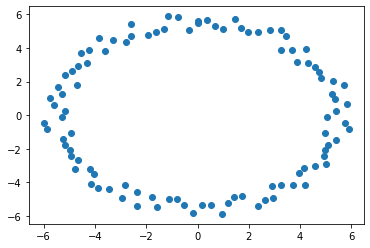

In [15]:
t = linspace(0,2*pi, 100)
r = ones_like(t)*5 + random.rand(100)
x,y = r*sin(t), r*cos(t)
plt.scatter(x,y)

np.std(r)

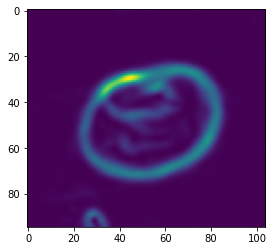

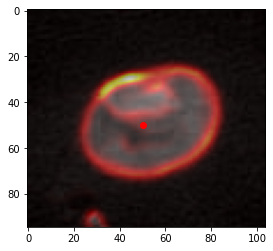

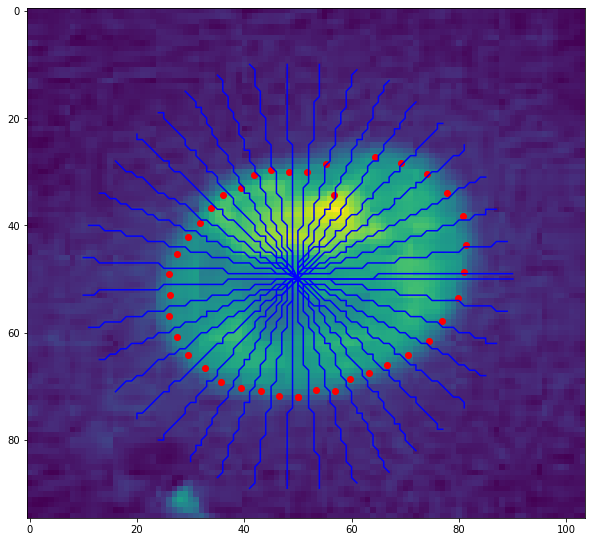

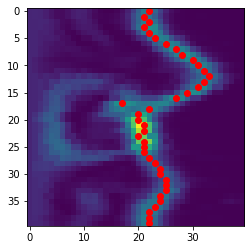

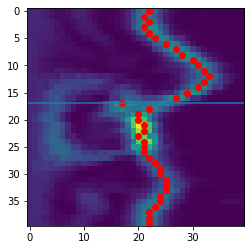

In [52]:
img = io.imread('FluorescentCells-1.png')[:,:,2]
fimg = filters.gaussian(img, sigma=2)
dx = gradient(fimg, axis=0)
dy = gradient(fimg, axis=1)
gr = dx**2 + dy**2
imshow(gr)
show()
# fimg = filters.difference_of_gaussians(img, 5)
fimg = gr
imshow(fimg)

x0 = 50
y0 = 50
scatter(x0, y0, color='red')

def from_polar(r,t, x0, y0):
    x = r*cos(t) + x0
    y = r*sin(t) + y0
    return x, y


imshow(img, cmap='gray')
imshow(fimg, cmap='hot', alpha=0.5)
show()
figure(figsize=(10,10))
h,w = 40,40
r = linspace(0,40,h)
cs = zeros([h,w])
for i, t in ndenumerate(linspace(0,2*pi,w)):
    x, y = from_polar(r, t, x0, y0)
    x, y = x.astype(int), y.astype(int)
    data = fimg[x, y]
    rmax = argmax(data)
    xmax, ymax = from_polar(rmax, t, x0, y0)
    # plot(data)
    plot(x,y, color='blue')
    scatter(ymax, xmax, color='red')
    cs[i] = data
    # break
# show()
imshow(img)
show()

imshow(cs)
rs = zeros([h])
for i in range(h):
    r = argmax(cs[i])
    rs[i] = r
    scatter(r,i, color='red')
show()

ddf = gradient(gradient(rs))
# plot(ddf)

imshow(cs)
for i in range(h):
    r = argmax(cs[i])
    scatter(r,i, color='red')

axhline(argmax(ddf))

